# **설정 단계**
# 1. 시각화 자료에서 한글 적용을 위해 폰트 설치

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# 2. 폰트 적용을 위한 런타임 재시작 후 한글 폰트 설정

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트

# **전처리 단계**
# 1. 데이터 전처리 작업 및 데이터프레임 형성

# 1-1. 인천시 데이터 전처리 작업

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## 인천 데이터프레임 ##
idf1 = pd.read_csv('/content/drive/MyDrive/big_data/incheon.csv', encoding='cp949')
# 1. 변환 전 기존 데이터 출력
print(idf1.head(), '\n')
# 2. 문자열 데이터를 간략히 하여 정수형 데이터로 입력
idf1['연도'] = idf1['기간'].str.split('~').str[0].str.split('-').str[0].astype(int)
# 3. 불필요한 데이터 삭제
idf1.drop(['기간', '연령별', '연령별_건수'], axis=1, inplace=True)
# 4. 열 이름 재설정
idf1.columns = ['구별', '발생_건수', '연도']
# 5. idf1을 idf2로 복제
idf2 = idf1[:]
# 6 최종 변환 데이터 출력
print(idf2.head())

                      기간    구별  구별_건수     연령별  연령별_건수
0  2023-06-01~2023-12-31   강화군      4  20대 이하   137.0
1  2023-06-01~2023-12-31   옹진군      0     30대   862.0
2  2023-06-01~2023-12-31    중구     14     40대   535.0
3  2023-06-01~2023-12-31    동구      2     50대   236.0
4  2023-06-01~2023-12-31  미추홀구   1482     60대   125.0 

     구별  발생_건수    연도
0   강화군      4  2023
1   옹진군      0  2023
2    중구     14  2023
3    동구      2  2023
4  미추홀구   1482  2023


# 1-2. 부산시 데이터 전처리 작업

In [ ]:
## 부산 데이터프레임 ##
bdf1 = pd.read_csv('/content/drive/MyDrive/big_data/busan.csv', encoding='cp949')
# 1. 변환 전 기존 데이터 출력
print(bdf1.head(),'\n')
# 2. 열 이름 중, 연도에서 '년'을 제거한 정수형 데이터 입력
bdf1.columns = ['구별', 2023, 2024, 2025]
# 3. '구별'을 인덱스로 설정
bdf2 = bdf1.set_index('구별')
# 4. stack 함수를 사용하여 시각화하기 편한 자료로 변형
bdf3 = bdf2.stack().reset_index()
# 5. 열 이름 재설정
bdf3.columns = ['구별', '연도', '발생_건수']
# 6. 최종 변환 데이터 출력
print(bdf3.head())

     구분  2023년  2024년  2025년
0    중구     77     67     12
1    서구     36     55     23
2    동구     85     55     11
3   영도구     32     51      2
4  부산진구    424    313     62 

   구별    연도  발생_건수
0  중구  2023     77
1  중구  2024     67
2  중구  2025     12
3  서구  2023     36
4  서구  2024     55


# 1-3. 광주시 데이터 전처리 작업

In [ ]:
## 광주 데이터프레임 ##
gdf1 = pd.read_csv('/content/drive/MyDrive/big_data/gwangju.csv', encoding='cp949')
# 1. 변환 전 기존 데이터 출력
print(gdf1.head(),'\n')
# 2. '연도'를 인덱스로 설정
gdf2 = gdf1.set_index('연도')
# 3. stack 함수를 사용하여 시각화하기 편한 자료로 변형
gdf3 = gdf2.stack().reset_index()
# 4. 열 이름 재설정
gdf3.columns = ['연도', '구별', '발생_건수']
# 5. 최종 변환 데이터 출력
print(gdf3.head())

     연도  동구  서구  남구  북구  광산구
0  2023   3   4   7  16   76
1  2024  10  26  27  75  100
2  2025   5   5   1   9   28 

     연도   구별  발생_건수
0  2023   동구      3
1  2023   서구      4
2  2023   남구      7
3  2023   북구     16
4  2023  광산구     76


# 1-4. 울산시 데이터 전처리 작업

In [ ]:
## 울산 데이터프레임 ##
udf1 = pd.read_csv('/content/drive/MyDrive/big_data/ulsan.csv', encoding='cp949')
# 1. 변환 전 기존 데이터 출력
print(udf1.head(),'\n')
# 2. 열 이름 중, 연도에서 '년'을 제거한 정수형 데이터 입력
udf1.columns = ['구별', 2023, 2024, 2025]
# 3. '연도'를 인덱스로 설정
udf2 = udf1.set_index('구별')
# 4. stack 함수를 사용하여 시각화하기 편한 자료로 변형
udf3 = udf2.stack().reset_index()
# 5. 열 이름 재설정
udf3.columns = ['구별', '연도', '발생_건수']
# 6. 최종 변환 데이터 출력
print(udf3.head())

    구분  2023년  2024년  2025년
0   중구      4      7      0
1   남구     77     45      1
2   동구      2      0      0
3   북구     11      3      1
4  울주군     12      6      0 

   구별    연도  발생_건수
0  중구  2023      4
1  중구  2024      7
2  중구  2025      0
3  남구  2023     77
4  남구  2024     45


# **시각화 단계**
# 1. 시각화 작업(광역시별)

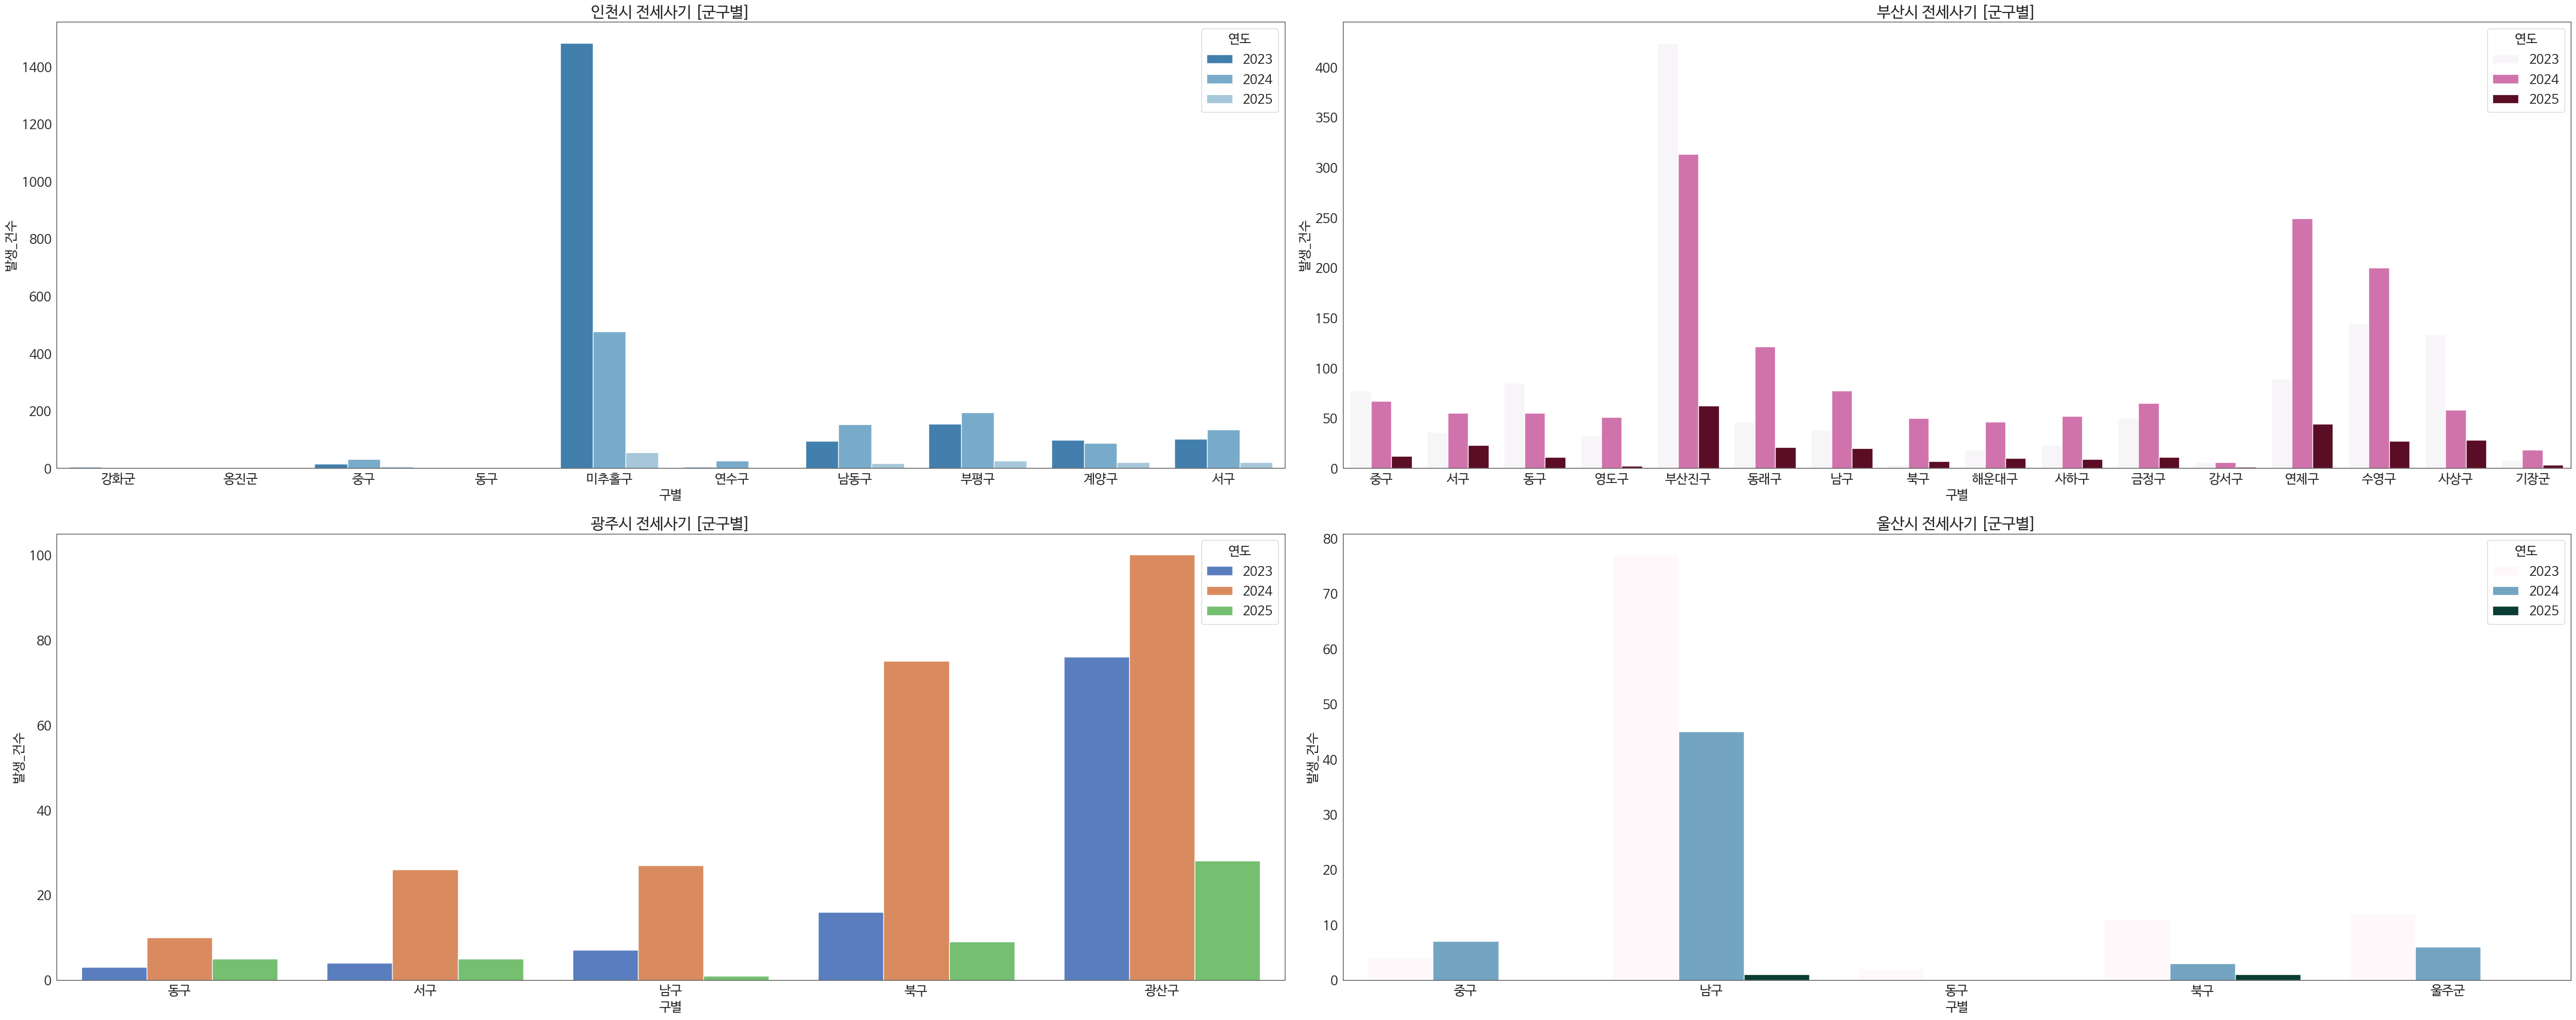

In [ ]:
# 1. 그래프 사이즈 설정
fig=plt.figure(figsize=(50,20))
# 2. 그래프가 배치될 위치 설정
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

# 3. 시각화 자료 표현 방식 설정
sns.set_style('white')
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

## sns.barplot을 사용하여 시각화 ##
# 인천 #
sns.barplot(data=idf2, x='구별', y='발생_건수', hue='연도', palette='tab20c', ax=ax1)
ax1.set_title('인천시 전세사기 [군구별]')
# 부산 #
sns.barplot(data=bdf3, x='구별',  y ='발생_건수', hue='연도', palette='PuRd', ax=ax2)
ax2.set_title('부산시 전세사기 [군구별]')
# 광주 #
sns.barplot(data=gdf3, x='구별',  y ='발생_건수', hue='연도', palette='muted', ax=ax3)
ax3.set_title('광주시 전세사기 [군구별]')
# 울산 #
sns.barplot(data=udf3, x='구별',  y ='발생_건수', hue='연도', palette='PuBuGn', ax=ax4)
ax4.set_title('울산시 전세사기 [군구별]')

plt.tight_layout()
plt.show()

# 2. 시각화 작업(전국)

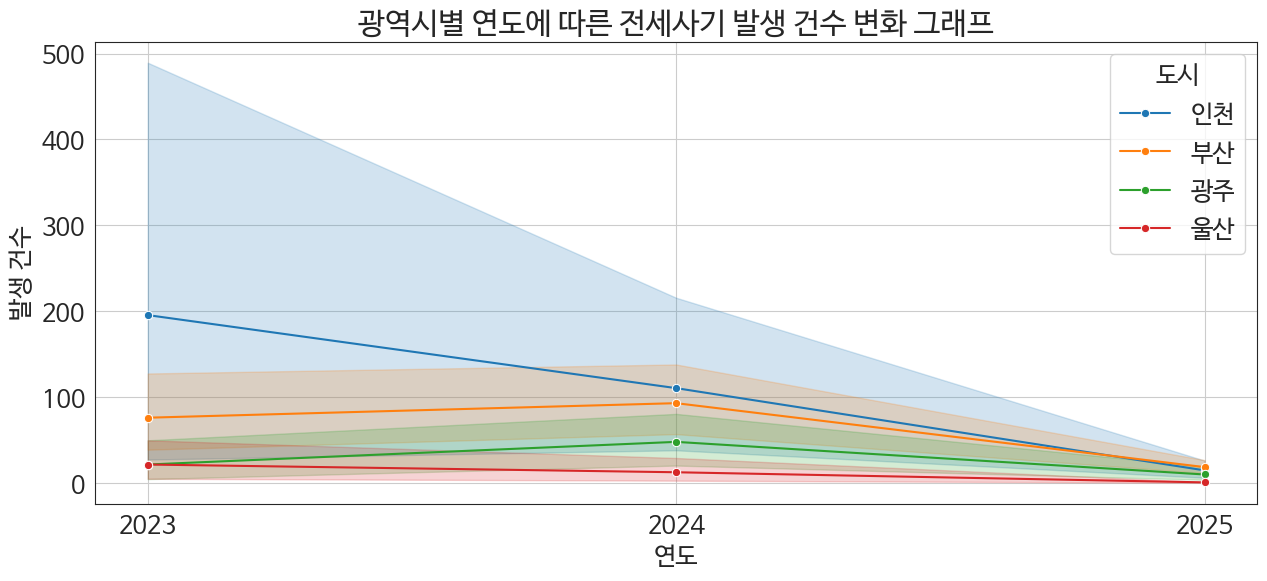

In [17]:
# 1. 각 데이터 프레임에 '도시'열 추가
idf2.loc[:, '도시'] = '인천'
bdf3.loc[:, '도시'] = '부산'
gdf3.loc[:, '도시'] = '광주'
udf3.loc[:, '도시'] = '울산'

# 2. 네 도시의 데이터를 하나로 총합
df_all = pd.concat([idf2, bdf3, gdf3, udf3], ignore_index=True)

# 3. 그래프 사이즈 설정
plt.figure(figsize=(15, 6))

# 4. 그래프의 x, y 좌표 값을 설정해주고 범주형 데이터로 '도시'열을 선택
sns.lineplot(x='연도', y='발생_건수', hue='도시', data=df_all, marker='o')

plt.xticks([2023, 2024, 2025], labels=['2023', '2024', '2025'])
plt.title('광역시별 연도에 따른 전세사기 발생 건수 변화 그래프')
plt.xlabel('연도')
plt.ylabel('발생 건수')
plt.grid(True)
plt.show()

# **머신러닝 단계**

# 데이터를 학습시켜 앞으로의 결과를 예측(인천)

훈련 점수 : 0.07741152912794003
테스트 점수: -38.23748601790237

=== 인천 미래 발생 건수 예측 ===
2026년 예상 발생 건수: -85.7 건
2027년 예상 발생 건수: -188.6 건
2028년 예상 발생 건수: -291.5 건


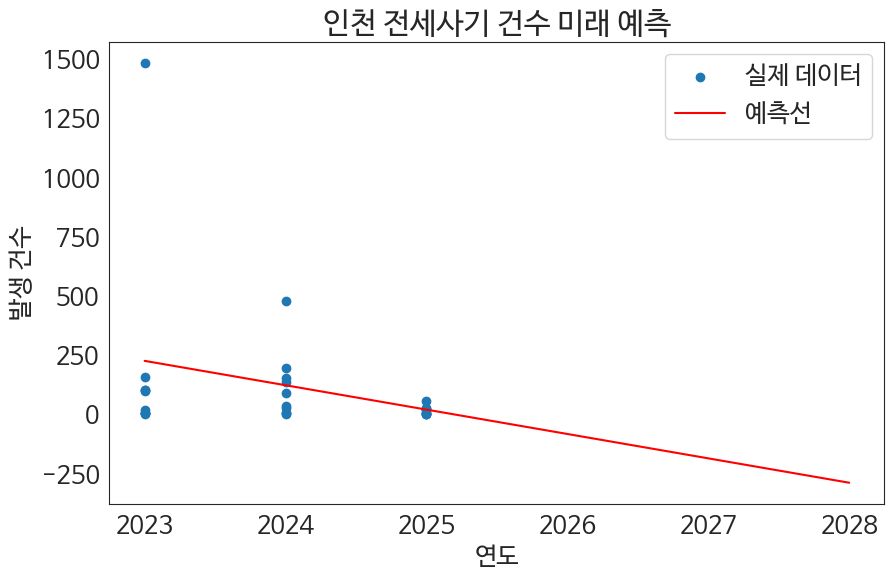

In [16]:
## 인천 데이터 | 학습을 위해 데이터 타입 변환 ##
idf2.loc[:, '연도'] = idf2['연도'].astype(int)
idf2.loc[:, '발생_건수'] = idf2['발생_건수'].astype(float)

# 1. 연도(X)에 따른 발생_건수(y)
X = idf2[['연도']].values
y = idf2['발생_건수'].values

# 2. train/test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# 3. 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 평가
print("훈련 점수 :", model.score(X_train, y_train))
print("테스트 점수:", model.score(X_test, y_test))

# 5. 향후 연도 예측
future_years = pd.DataFrame({'연도': [2026, 2027, 2028]})
future_pred = model.predict(future_years.values)

print("\n=== 인천 미래 발생 건수 예측 ===")
for y, p in zip(future_years['연도'], future_pred):
    print(f"{y}년 예상 발생 건수: {p:.1f} 건")

# 6. 시각화 (실제 데이터 + 회귀선)
plt.figure(figsize=(10,6))

# 실제 데이터 산점도
plt.scatter(idf2['연도'], idf2['발생_건수'], label='실제 데이터')

# 회귀선
years_line = np.array(range(idf2['연도'].min(), 2029)).reshape(-1,1)
pred_line = model.predict(years_line)
plt.plot(years_line, pred_line, color='red', label='예측선')

plt.xlabel('연도')
plt.ylabel('발생 건수')
plt.title('인천 전세사기 건수 미래 예측')
plt.legend()
plt.show()